In [30]:
import pandas as pd
import plotly
import plotly.express as px
import plotly.graph_objects as go
style.use('ggplot')

import cufflinks as cf
import plotly.offline as pyo
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot

import matplotlib.pyplot as plt
from matplotlib import style
%matplotlib inline

import folium
import warnings
warnings.filterwarnings('ignore')


In [2]:
pyo.init_notebook_mode(connected=True)
cf.go_offline()

plt.rcParams['figure.figsize']=17,12

In [3]:
data=pd.read_csv("D:\Infinnum\Projects\COVID-19\covid19-in-india\covid.csv")

data
 

,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,5/5/2020,5:00 PM,Andaman and Nicobar Islands,-,-,32,0,33
1,5/5/2020,5:00 PM,Andhra Pradesh,-,-,589,36,1717
2,5/5/2020,5:00 PM,Arunachal Pradesh,-,-,1,0,1
3,5/5/2020,5:00 PM,Assam,-,-,32,1,43
4,5/5/2020,5:00 PM,Bihar,-,-,130,4,529
5,5/5/2020,5:00 PM,Chandigarh,-,-,21,1,102
6,5/5/2020,5:00 PM,Chhattisgarh,-,-,36,0,58
7,5/5/2020,5:00 PM,Delhi,-,-,1431,64,4898
8,5/5/2020,5:00 PM,Goa,-,-,7,0,7
9,5/5/2020,5:00 PM,Gujarat,-,-,1195,319,5804


In [4]:
data['Active Cases']=data['Confirmed']-(data['Cured']+data['Deaths'])

In [5]:
data=data.drop(['ConfirmedIndianNational','ConfirmedForeignNational'],axis=1)

In [6]:
data

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,5/5/2020,5:00 PM,Andaman and Nicobar Islands,32,0,33,1
1,5/5/2020,5:00 PM,Andhra Pradesh,589,36,1717,1092
2,5/5/2020,5:00 PM,Arunachal Pradesh,1,0,1,0
3,5/5/2020,5:00 PM,Assam,32,1,43,10
4,5/5/2020,5:00 PM,Bihar,130,4,529,395
5,5/5/2020,5:00 PM,Chandigarh,21,1,102,80
6,5/5/2020,5:00 PM,Chhattisgarh,36,0,58,22
7,5/5/2020,5:00 PM,Delhi,1431,64,4898,3403
8,5/5/2020,5:00 PM,Goa,7,0,7,0
9,5/5/2020,5:00 PM,Gujarat,1195,319,5804,4290


In [7]:
data.style.background_gradient(cmap='Reds')

,Date,Time,State/UnionTerritory,Cured,Deaths,Confirmed,Active Cases
0,5/5/2020,5:00 PM,Andaman and Nicobar Islands,32,0,33,1
1,5/5/2020,5:00 PM,Andhra Pradesh,589,36,1717,1092
2,5/5/2020,5:00 PM,Arunachal Pradesh,1,0,1,0
3,5/5/2020,5:00 PM,Assam,32,1,43,10
4,5/5/2020,5:00 PM,Bihar,130,4,529,395
5,5/5/2020,5:00 PM,Chandigarh,21,1,102,80
6,5/5/2020,5:00 PM,Chhattisgarh,36,0,58,22
7,5/5/2020,5:00 PM,Delhi,1431,64,4898,3403
8,5/5/2020,5:00 PM,Goa,7,0,7,0
9,5/5/2020,5:00 PM,Gujarat,1195,319,5804,4290


In [8]:
Total_active=data.groupby('State/UnionTerritory')['Active Cases'].sum().sort_values(ascending=False).to_frame()

In [9]:
Total_active.style.background_gradient(cmap='Reds')

,Active Cases
State/UnionTerritory,
Maharashtra,11493
Gujarat,4290
Delhi,3403
Tamil Nadu,2110
Madhya Pradesh,1873
Uttar Pradesh,1862
Rajasthan,1590
Andhra Pradesh,1092
Punjab,1082


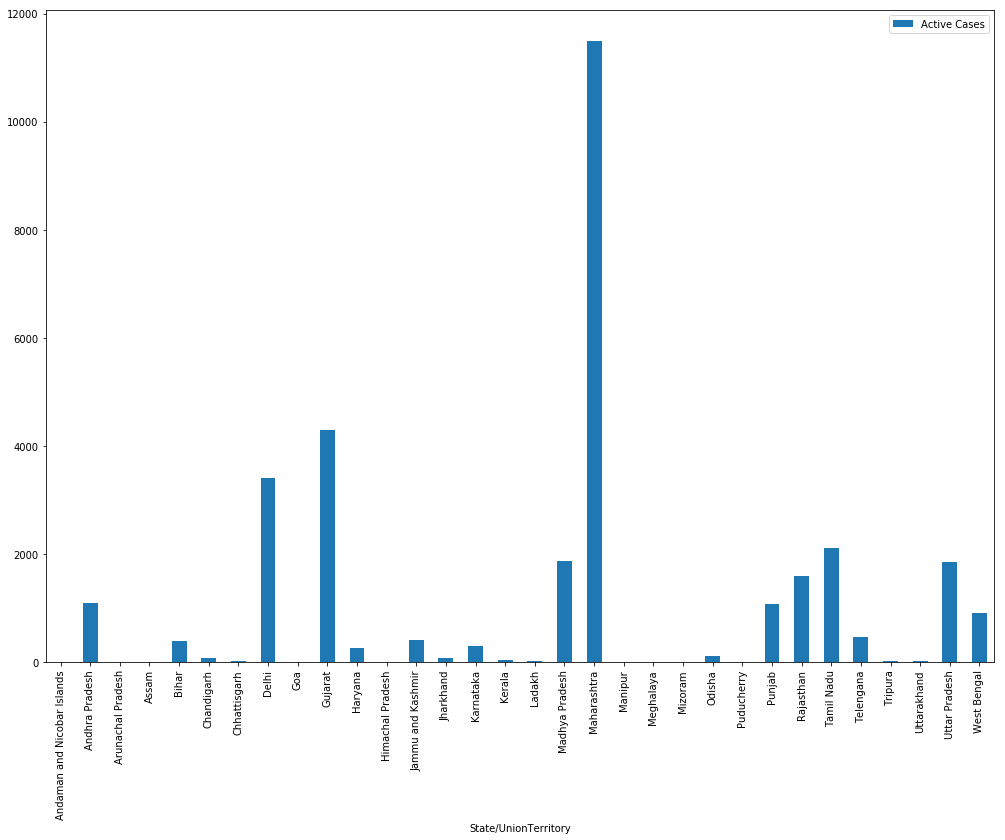

In [10]:
data.plot(kind='bar',x='State/UnionTerritory',y='Active Cases')

<BarContainer object of 32 artists>

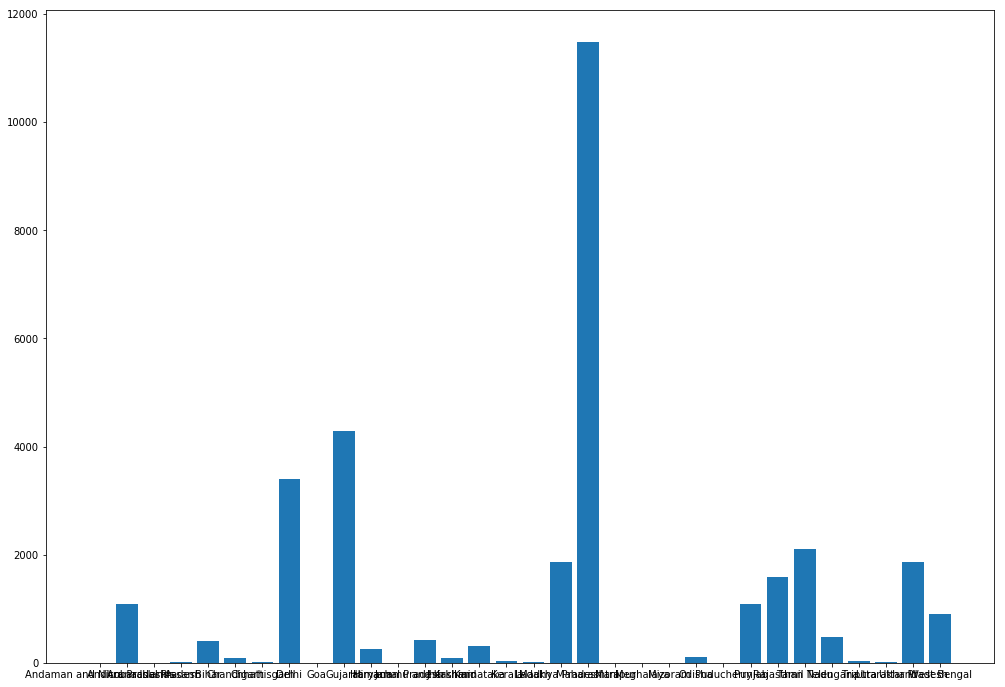

In [11]:
## Matplotlib 
plt.bar(data['State/UnionTerritory'],data['Active Cases'])

In [12]:
px.bar(data,x='State/UnionTerritory',y='Active Cases')

In [13]:
data.iplot(kind='scatter',x='State/UnionTerritory',y='Active Cases',mode='markers+lines')

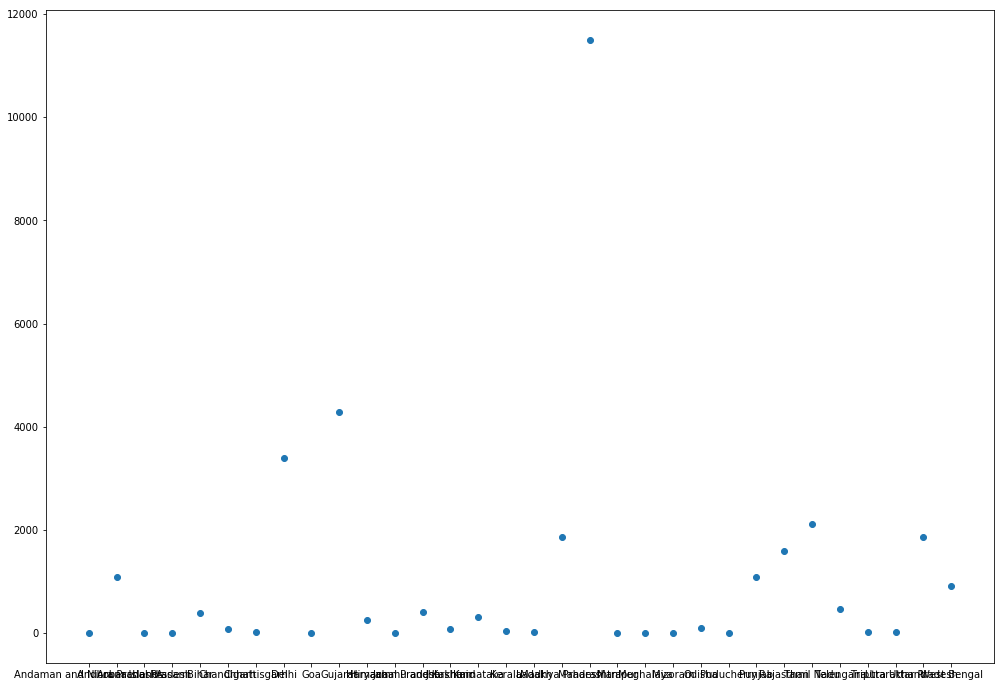

In [14]:
plt.scatter(data['State/UnionTerritory'],data['Active Cases'])

In [15]:
data.iplot(kind='scatter',x='State/UnionTerritory',y='Active Cases',mode='markers+lines',title='State Vise Cases',xTitle='Name of States',yTitle='No of Cases')
px.scatter(data,x='State/UnionTerritory',y='Active Cases',title='State Vise Cases')

Text(0, 0.5, 'No of Cases')

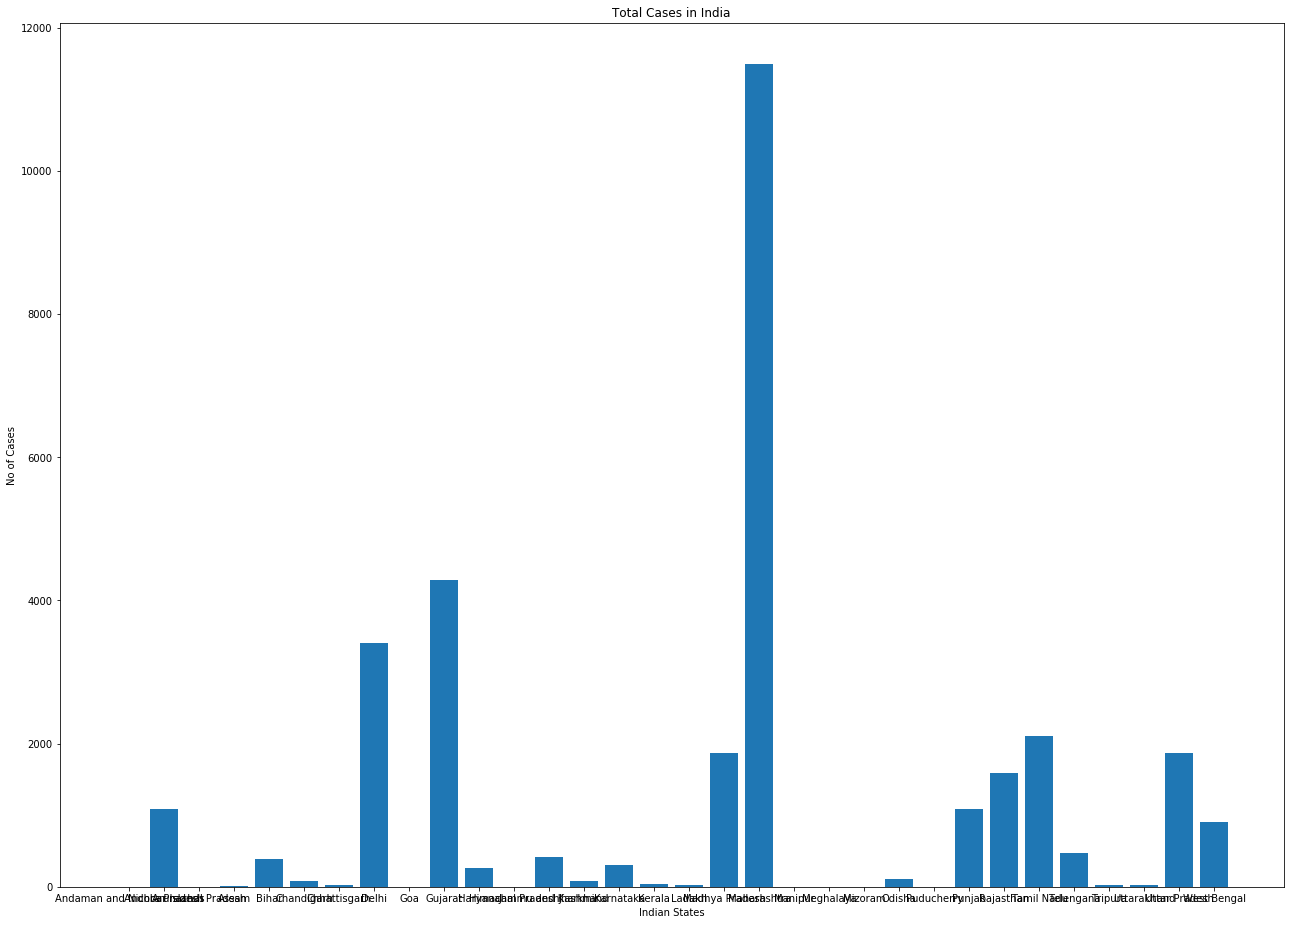

In [16]:
# OOM

#matplotlib

fig=plt.figure()
axes=fig.add_axes([0,0,1,1])
axes.bar(data['State/UnionTerritory'],data['Active Cases'])
axes.set_title('Total Cases in India')
axes.set_xlabel('Indian States')
axes.set_ylabel('No of Cases')

In [17]:
fig=go.Figure()
fig.add_trace(go.Bar(x=data['State/UnionTerritory'],y=data['Active Cases']))
fig.update_layout(title='Total Cases in India',xaxis=dict(title="Indian States"),yaxis=dict(title="No of Cases"))

In [18]:
Indian_cord=pd.read_excel(r"D:\Infinnum\Projects\COVID-19\Indian Coordinates.xlsx")

In [19]:
Indian_cord

,State/UnionTerritory,Latitude,Longitude
0,Andaman And Nicobar,11.667026,92.735983
1,Andhra Pradesh,14.750429,78.570026
2,Arunachal Pradesh,27.100399,93.616601
3,Assam,26.749981,94.216667
4,Bihar,25.785414,87.479973
5,Chandigarh,30.719997,76.780006
6,Chhattisgarh,22.090420,82.159987
7,Dadra And Nagar Haveli,20.266578,73.016618
8,Delhi,28.669993,77.230004
9,Goa,15.491997,73.818001


In [20]:
india_cases=pd.merge(Indian_cord,data,on='State/UnionTerritory')

In [21]:
india_cases

,State/UnionTerritory,Latitude,Longitude,Date,Time,Cured,Deaths,Confirmed,Active Cases
0,Andhra Pradesh,14.750429,78.570026,5/5/2020,5:00 PM,589,36,1717,1092
1,Delhi,28.669993,77.230004,5/5/2020,5:00 PM,1431,64,4898,3403
2,Haryana,28.450006,77.019991,5/5/2020,5:00 PM,254,6,517,257
3,Karnataka,12.570381,76.919997,5/5/2020,5:00 PM,324,28,659,307
4,Kerala,8.900373,76.569993,5/5/2020,5:00 PM,462,4,500,34
5,Maharashtra,19.250232,73.160175,5/5/2020,5:00 PM,2465,583,14541,11493
6,Punjab,31.519974,75.980003,5/5/2020,5:00 PM,128,23,1233,1082
7,Rajasthan,26.449999,74.639981,5/5/2020,5:00 PM,1394,77,3061,1590
8,Telengana,18.112400,79.019300,5/5/2020,5:00 PM,585,29,1085,471
9,Tamil Nadu,12.920386,79.150042,5/5/2020,5:00 PM,1409,31,3550,2110


In [24]:
map=folium.Map(location=[20,70],zoom_start=4,tiles='Stamenterrain')

for lat,long,value, name in zip(india_cases['Latitude'],india_cases['Longitude'],india_cases['Confirmed'],india_cases['State/UnionTerritory']):
    folium.CircleMarker([lat,long],radius=40,popup=('<strong>State</strong>: '+str(name).capitalize()+',<br>' ' <strong> Total Cases </strong>:' +str(value)+'<br>'),color='red',fill_opacity=0.3).add_to(map)

In [25]:
map

In [27]:
mh=pd.read_csv(r"D:\Infinnum\Projects\COVID-19\covid19-in-india\Maharashtra.csv",date_parser="Date")
gj=pd.read_csv(r"D:\Infinnum\Projects\COVID-19\covid19-in-india\Gujarat.csv",date_parser="Date")
tl=pd.read_csv(r"D:\Infinnum\Projects\COVID-19\covid19-in-india\Tamil Nadu.csv",date_parser="Date")
dl=pd.read_csv(r"D:\Infinnum\Projects\COVID-19\covid19-in-india\Delhi.csv",date_parser="Date")


Text(0.5, 1.0, 'Confirmed Cases in India till MAY 20 2020')

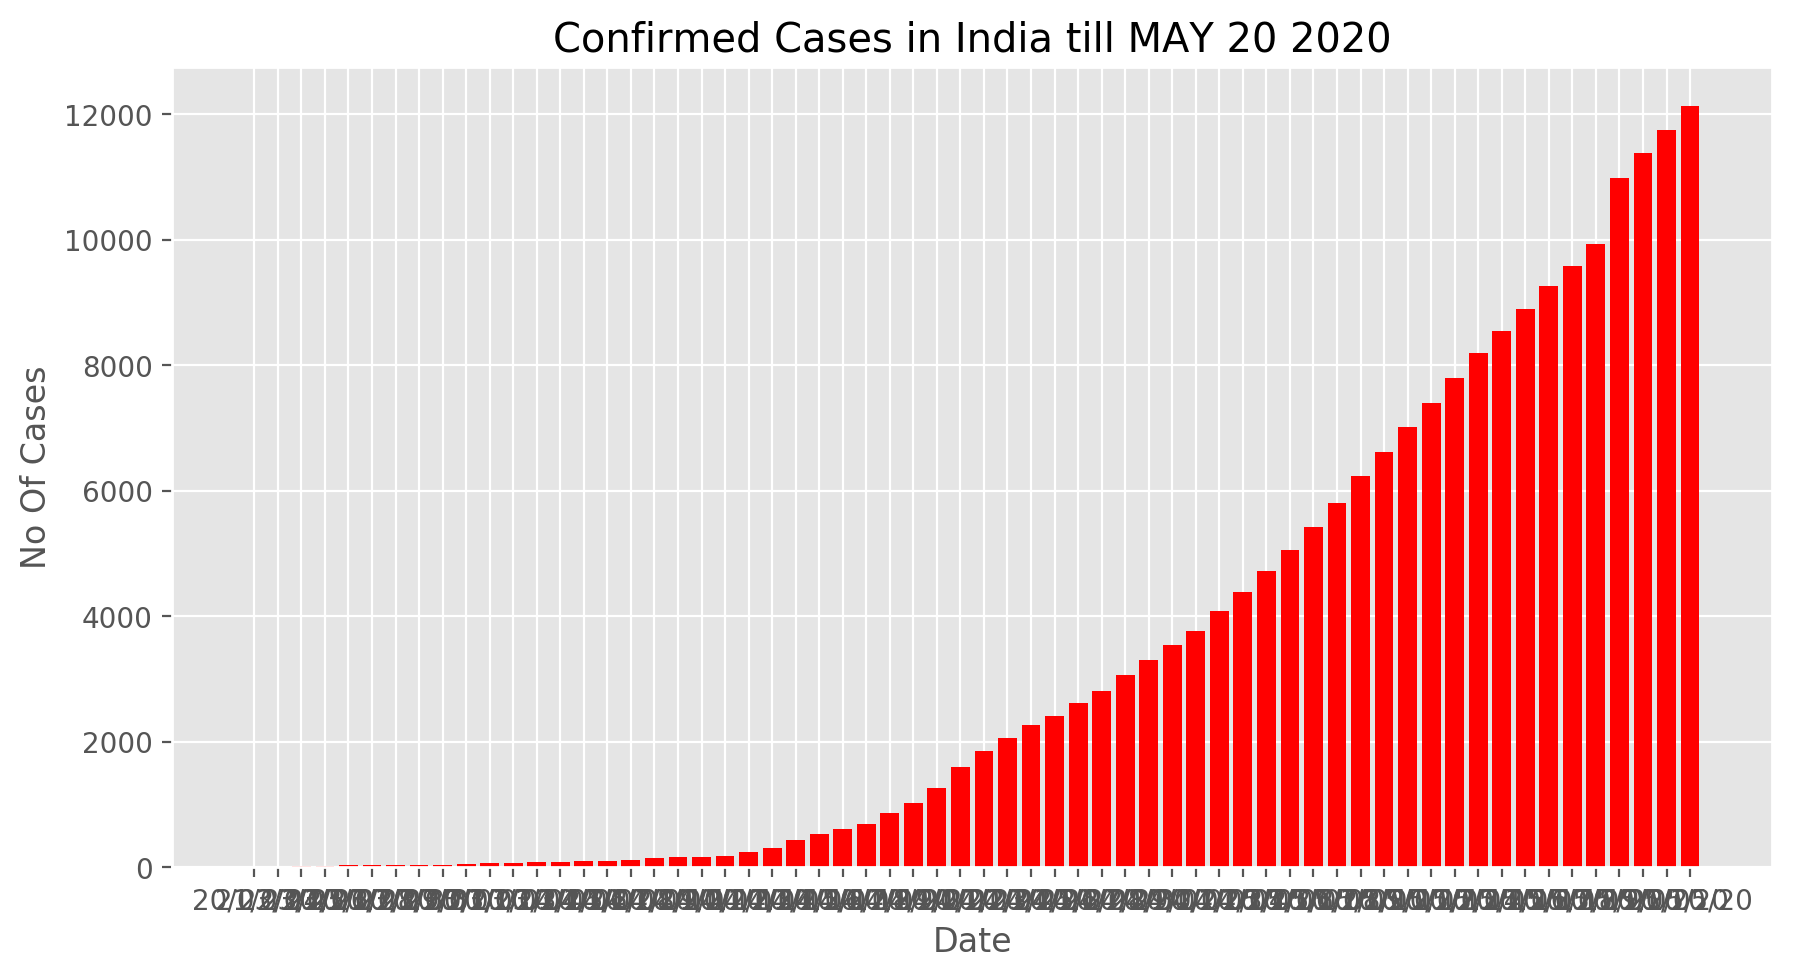

In [34]:
 #matplotlib
    
fig=plt.figure(figsize=(10,5),dpi=200)
axes=fig.add_axes([0.1,0.1,0.8,0.8])
axes.bar(gj['Date'],gj['Confirmed'],color='red')
axes.set_xlabel("Date")
axes.set_ylabel("No Of Cases")
axes.set_title("Confirmed Cases in GUJARAT till MAY 20 2020")

In [35]:
#PLotly

fig=px.bar(gj,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases in Gujarat')
fig.show()

In [36]:
fig=px.scatter(gj,x='Date',y='Confirmed',color='Confirmed',title='Confirmed Cases in Gujarat')
fig.show()

In [45]:
gj.iplot(kind='line',x='Date',y='Confirmed',color='Red',title='Confirmed Cases in Gujarat')


In [53]:
from plotly.subplots import make_subplots

fig=make_subplots(
rows=2,cols=2,specs=[[{"secondary_y":True},{"secondary_y":True}],[{"secondary_y":True},{"secondary_y":True}]],subplot_titles=("Maharastra","Gujarat","Delhi","Tamil Nadu"))

fig.add_trace(go.Bar(x=mh['Date'],y=mh['Confirmed'],marker=dict(color=mh['Confirmed'],coloraxis='coloraxis')),1,1)

fig.add_trace(go.Bar(x=gj['Date'],y=gj['Confirmed'],marker=dict(color=gj['Confirmed'],coloraxis='coloraxis')),1,2)

fig.add_trace(go.Bar(x=dl['Date'],y=dl['Confirmed'],marker=dict(color=dl['Confirmed'],coloraxis='coloraxis')),2,1)

fig.add_trace(go.Bar(x=tl['Date'],y=tl['Confirmed'],marker=dict(color=tl['Confirmed'],coloraxis='coloraxis')),2,2)

fig.show()

In [ ]:
#WORLD MAP


In [54]:
worlddata=pd.read_csv("D:\Infinnum\Projects\COVID-19\covid_19_data.csv",parse_dates=['Last Update','ObservationDate'])

In [56]:
worlddata.rename(columns={'ObservationDate':'Date','Country/Region':'Country'},inplace=True)


In [78]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,36,2020-01-22,NaN,Japan,2020-01-22 00:00:00,2,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
1,74,2020-01-23,NaN,Japan,2020-01-23 00:00:00,1,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
2,120,2020-01-24,NaN,Japan,2020-01-24 00:00:00,2,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
3,161,2020-01-25,NaN,Japan,2020-01-25 00:00:00,2,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
4,207,2020-01-26,NaN,Japan,2020-01-26 00:00:00,4,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
5,254,2020-01-27,NaN,Japan,2020-01-27 00:00:00,4,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
6,305,2020-01-28,NaN,Japan,2020-01-28 00:00:00,7,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
7,357,2020-01-29,NaN,Japan,2020-01-29 00:00:00,7,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
8,412,2020-01-30,NaN,Japan,2020-01-30 00:00:00,11,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
9,467,2020-01-31,NaN,Japan,2020-01-31 00:00:00,15,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367


In [64]:
Confirm=worlddata.groupby('Date').sum()['Confirmed'].reset_index()
Death=worlddata.groupby('Date').sum()['Deaths'].reset_index()
Recover=worlddata.groupby('Date').sum()['Recovered'].reset_index()

In [67]:
fig=go.Figure()
fig.add_trace(go.Scatter(x=Confirm['Date'],y=Confirm['Confirmed'],mode='lines+markers',name='Confirm',line=dict(color='blue',width=2)))
fig.add_trace(go.Scatter(x=Death['Date'],y=Death['Deaths'],mode='lines+markers',name='Death',line=dict(color='red',width=2)))
fig.add_trace(go.Scatter(x=Recover['Date'],y=Recover['Recovered'],mode='lines+markers',name='Recover',line=dict(color='green',width=2)))

In [82]:
df_confirmed=pd.read_csv(r"D:\Infinnum\Projects\COVID-19\time_series_covid_19_confirmed.csv")
df_confirmed.rename(columns={'Country/Region':'Country'},inplace=True)

In [81]:
df_confirmed

,Province/State,Country,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,NaN,Afghanistan,33.000000,65.000000,0,0,0,0,0,0,...,4402,4687,4963,5226,5639,6053,6402,6664,7072,7653
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,...,868,872,876,880,898,916,933,946,948,949
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,...,5723,5891,6067,6253,6442,6629,6821,7019,7201,7377
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,...,755,755,758,760,761,761,761,761,761,761
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,...,45,45,45,45,48,48,48,48,50,52
5,NaN,Antigua and Barbuda,17.060800,-61.796400,0,0,0,0,0,0,...,25,25,25,25,25,25,25,25,25,25
6,NaN,Argentina,-38.416100,-63.616700,0,0,0,0,0,0,...,6034,6278,6563,6879,7134,7479,7805,8068,8371,8809
7,NaN,Armenia,40.069100,45.038200,0,0,0,0,0,0,...,3313,3392,3538,3718,3860,4044,4283,4472,4823,5041
8,Australian Capital Territory,Australia,-35.473500,149.012400,0,0,0,0,0,0,...,107,107,107,107,107,107,107,107,107,107
9,New South Wales,Australia,-33.868800,151.209300,0,0,0,0,3,4,...,3053,3053,3059,3063,3071,3074,3075,3076,3078,3081


In [74]:
df_latlong=pd.merge(worlddata,df_confirmed,on=['Country','Province/State'])

In [84]:
wmap=px.density_mapbox(df_latlong,lat='Lat',lon='Long',hover_name="Province/State",hover_data=["Confirmed","Deaths","Recovered"],color_continuous_scale="portland",radius=7,zoom=0,height=700)
wmap.update_layout(title="World Wide Corona Reports")
wmap.update_layout(mapbox_style='open_street_map',mapbox_center_lon=0)
wmap.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
wmap.show()

In [80]:
df_latlong

,SNo,Date,Province/State,Country,Last Update,Confirmed,Deaths,Recovered,Lat,Long,...,5/10/20,5/11/20,5/12/20,5/13/20,5/14/20,5/15/20,5/16/20,5/17/20,5/18/20,5/19/20
0,36,2020-01-22,NaN,Japan,2020-01-22 00:00:00,2,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
1,74,2020-01-23,NaN,Japan,2020-01-23 00:00:00,1,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
2,120,2020-01-24,NaN,Japan,2020-01-24 00:00:00,2,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
3,161,2020-01-25,NaN,Japan,2020-01-25 00:00:00,2,0,0,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
4,207,2020-01-26,NaN,Japan,2020-01-26 00:00:00,4,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
5,254,2020-01-27,NaN,Japan,2020-01-27 00:00:00,4,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
6,305,2020-01-28,NaN,Japan,2020-01-28 00:00:00,7,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
7,357,2020-01-29,NaN,Japan,2020-01-29 00:00:00,7,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
8,412,2020-01-30,NaN,Japan,2020-01-30 00:00:00,11,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
9,467,2020-01-31,NaN,Japan,2020-01-31 00:00:00,15,0,1,36.000000,138.000000,...,15777,15847,15968,16049,16120,16203,16237,16285,16305,16367
